In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load Dataset

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
len(X_test)

10000

In [7]:
## y_train[0] ## Labels

In [8]:
## X_train[0] ## Picture

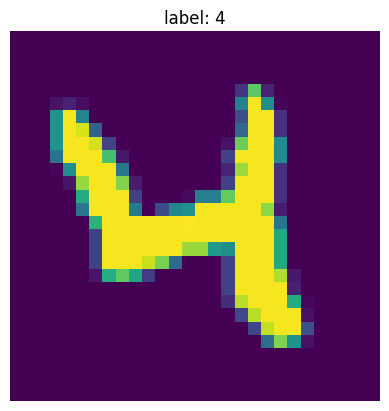

In [9]:
plt.imshow(X_train[20])
plt.title(f"label: {y_train[20]}")
plt.axis("off")
plt.show()

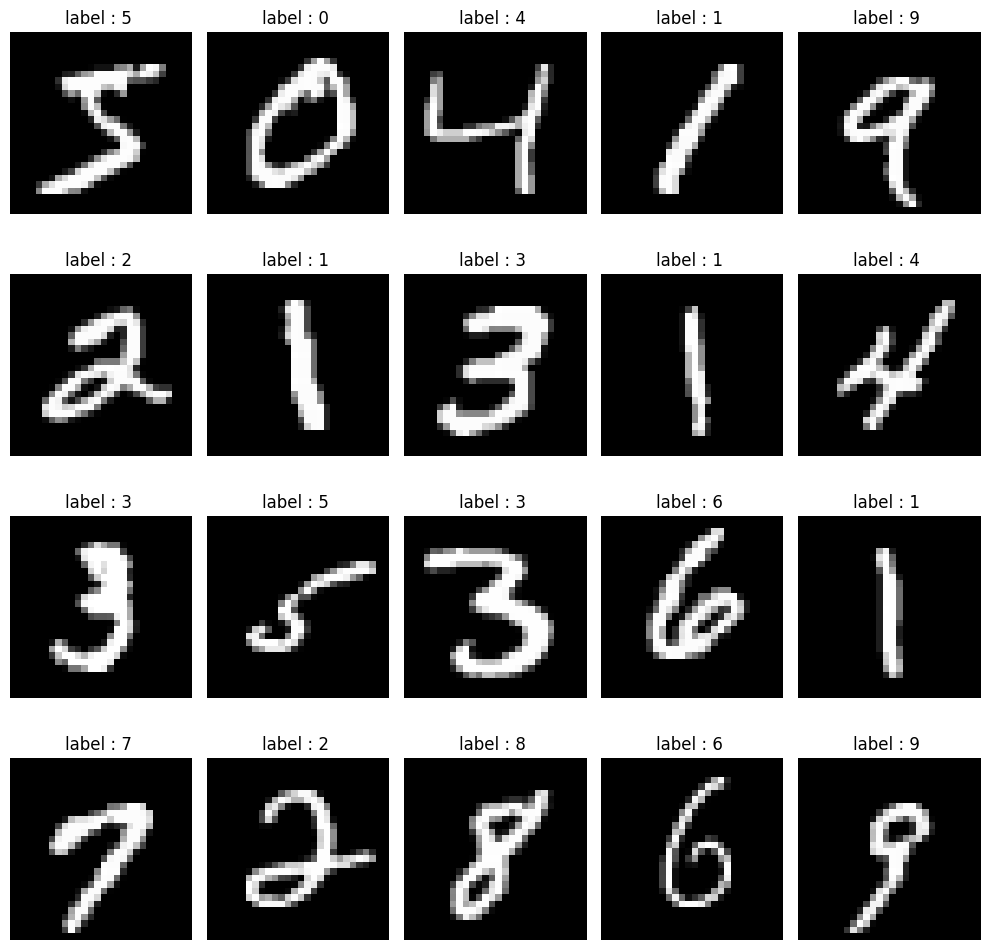

In [10]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i],cmap="gray")
    plt.title(f"label : {y_train[i]} ")
    plt.axis("off")

plt.tight_layout()
plt.show()

## Normalization

In [11]:
X_train = X_train.reshape(-1,28*28) / 255.0
X_test = X_test.reshape(-1,28*28) / 255.0
print(X_train)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Define NN Architechture

In [12]:
model = Sequential([
    Dense(128,activation="relu",input_shape=(28*28,)), # Input Layer
    Dense(64,activation="relu"),                       # Hidden Layer
    Dense(32,activation="relu"),
    Dense(10,activation="softmax")                     # Output Layer (Softmax for Classification)
])

C:\Users\Asus\miniconda3\envs\alleys\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model

In [18]:
model.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

In [23]:
60000 * 0.25

15000.0

In [25]:
60000 - 15000

45000

In [27]:
45000 / 32

1406.25

Samples for validation =  15000.0
Going for Training =  45000.0
Total number of batches =  1406.25


## Train the Model

In [20]:
model.fit(X_train,
          y_train,
          epochs = 10,
          batch_size = 32,
          validation_split=0.25
         )

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9965 - loss: 0.0107 - val_accuracy: 0.9759 - val_loss: 0.1281
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9975 - loss: 0.0087 - val_accuracy: 0.9775 - val_loss: 0.1227
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9983 - loss: 0.0058 - val_accuracy: 0.9761 - val_loss: 0.1331
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9973 - loss: 0.0092 - val_accuracy: 0.9745 - val_loss: 0.1432
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9967 - loss: 0.0105 - val_accuracy: 0.9733 - val_loss: 0.1643
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9974 - loss: 0.0068 - val_accuracy: 0.9744 - val_loss: 0.1557
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9975 - loss: 0.0074 - val_accuracy: 0.9759 - val_loss: 0.1535
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9982 - loss: 0.0055 - 

In [36]:
def calculate_epochs_progress(validation_split,batch_size,total_epochs):
    validation_samples = len(X_train) * validation_split;
    training_samples = len(X_train) - validation_samples;
    total_batches = (training_samples / batch_size);
    print("Samples for validation = ",validation_samples);
    print("Going for Training = ",training_samples);
    print("Total number of batches = ",total_batches);
    

In [37]:
calculate_epochs_progress(0.25,32,10)

Samples for validation =  15000.0
Going for Training =  45000.0
Total number of batches =  1406.25


## Evaluate Model Performance on Test Data

In [39]:
test_loss , test_accuracy = model.evaluate(X_test,y_test)
print("Test Accuracy = ",test_accuracy)
print("Test Loss = ",test_loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.9708 - loss: 0.2007
Test Accuracy =  0.9764000177383423
Test Loss =  0.15918347239494324
